전처리 코드

In [91]:
import json
import csv
from datetime import datetime

# JSON 객체가 여러 개 포함된 텍스트 파일 경로
input_file = 'data.txt'
# 출력할 CSV 파일 경로
output_file = 'data.csv'

# CSV 파일 헤더 정의
csv_headers = [
    "index",
    "date",
    "hour",
    "minute",
    "formatVersion",
    "webaclId",
    "terminatingRuleId",
    "terminatingRuleType",
    "action",
    "terminatingRuleMatchDetails",
    "httpSourceName",
    "httpSourceId",
    "ruleGroupList",
    "rateBasedRuleId",
    "rateBasedRuleName",
    "limitKey",
    "maxRateAllowed",
    "evaluationWindowSec",
    "limitValue",
    "clientIp",
    "country",
    "uri",
    "args",
    "httpVersion",
    "httpMethod",
    "requestId",
    "header_Host",
    "header_User_Agent",
    "header_Accept_Encoding",
    "header_Accept",
    "header_Connection",
    "header_x_datadog_trace_id",
    "header_x_datadog_parent_id",
    "header_x_datadog_sampling_priority"
]

# CSV 파일 쓰기
with open(output_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=csv_headers)
    writer.writeheader()

    # 텍스트 파일에서 각 JSON 객체 읽기
    with open(input_file, mode='r') as infile:
        for idx, line in enumerate(infile, start=1):
            if line.strip():  # 빈 줄 건너뛰기
                data = json.loads(line.strip())
                
                # timestamp를 일반 시간 표기로 변환
                timestamp = data.get("timestamp", None)
                if timestamp:
                    dt_object = datetime.utcfromtimestamp(timestamp / 1000)  # 밀리초를 초로 변환
                    date_str = dt_object.strftime('%Y-%m-%d')
                    hour_str = dt_object.strftime('%H')
                    minute_str = dt_object.strftime('%M')
                else:
                    date_str = ""
                    hour_str = ""
                    minute_str = ""

                # 각 JSON 객체에서 필요한 정보 추출
                row = {
                    "index": idx,
                    "date": date_str,
                    "hour": hour_str,
                    "minute": minute_str,
                    "formatVersion": data.get("formatVersion", ""),
                    "webaclId": data.get("webaclId", ""),
                    "terminatingRuleId": data.get("terminatingRuleId", ""),
                    "terminatingRuleType": data.get("terminatingRuleType", ""),
                    "action": data.get("action", ""),
                    "terminatingRuleMatchDetails": data.get("terminatingRuleMatchDetails", ""),
                    "httpSourceName": data.get("httpSourceName", ""),
                    "httpSourceId": data.get("httpSourceId", ""),
                    "ruleGroupList": data.get("ruleGroupList", ""),
                    "rateBasedRuleId": "",
                    "rateBasedRuleName": "",
                    "limitKey": "",
                    "maxRateAllowed": "",
                    "evaluationWindowSec": "",
                    "limitValue": "",
                    "clientIp": "",
                    "country": "",
                    "uri": "",
                    "args": "",
                    "httpVersion": "",
                    "httpMethod": "",
                    "requestId": "",
                    "header_Host": "",
                    "header_User_Agent": "",
                    "header_Accept_Encoding": "",
                    "header_Accept": "",
                    "header_Connection": "",
                    "header_x_datadog_trace_id": "",
                    "header_x_datadog_parent_id": "",
                    "header_x_datadog_sampling_priority": ""
                }

                if "rateBasedRuleList" in data and data["rateBasedRuleList"]:
                    rate_rule = data["rateBasedRuleList"][0]
                    row.update({
                        "rateBasedRuleId": rate_rule.get("rateBasedRuleId", ""),
                        "rateBasedRuleName": rate_rule.get("rateBasedRuleName", ""),
                        "limitKey": rate_rule.get("limitKey", ""),
                        "maxRateAllowed": rate_rule.get("maxRateAllowed", ""),
                        "evaluationWindowSec": rate_rule.get("evaluationWindowSec", ""),
                        "limitValue": rate_rule.get("limitValue", "")
                    })
                
                if "httpRequest" in data:
                    http_request = data["httpRequest"]
                    row.update({
                        "clientIp": http_request.get("clientIp", ""),
                        "country": http_request.get("country", ""),
                        "uri": http_request.get("uri", ""),
                        "args": http_request.get("args", ""),
                        "httpVersion": http_request.get("httpVersion", ""),
                        "httpMethod": http_request.get("httpMethod", ""),
                        "requestId": http_request.get("requestId", "")
                    })
                    headers = {header["name"]: header["value"] for header in http_request.get("headers", [])}
                    row.update({
                        "header_Host": headers.get("Host", ""),
                        "header_User_Agent": headers.get("User-Agent", ""),
                        "header_Accept_Encoding": headers.get("Accept-Encoding", ""),
                        "header_Accept": headers.get("Accept", ""),
                        "header_Connection": headers.get("Connection", ""),
                        "header_x_datadog_trace_id": headers.get("x-datadog-trace-id", ""),
                        "header_x_datadog_parent_id": headers.get("x-datadog-parent-id", ""),
                        "header_x_datadog_sampling_priority": headers.get("x-datadog-sampling-priority", "")
                    })
                
                # CSV 파일에 행 쓰기
                writer.writerow(row)

print("CSV 파일로 변환이 완료되었습니다.")

CSV 파일로 변환이 완료되었습니다.


XGBoost

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# CSV 파일 로드
df = pd.read_csv('/Users/lkk/Desktop/AI/train.csv')

# 필요한 특성 선택 (예시)
features = ['clientIp', 'country', 'httpVersion',  'header_Host', 'header_User_Agent', 'hour','header_Connection']
target = 'action'  # 예측하려는 목표 변수


In [128]:
# 범주형 변수 인코딩
label_encoders = {}
for col in features:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# 목표 변수 인코딩
le_target = LabelEncoder()
df[target] = le_target.fit_transform(df[target])


In [117]:
# 범주형 변수 인코딩
label_encoders = {}
for col in features:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# 목표 변수 인코딩
le_target = LabelEncoder()
df[target] = le_target.fit_transform(df[target])

# 특성 및 타겟 데이터셋 생성
X = df[features]
y = df[target]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
# 모델 저장
joblib.dump(model, 'xgb_model.pkl')

# XGBoost 모델 생성 및 학습
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Accuracy: 0.8429752066115702
Confusion Matrix:
[[420  66]
 [ 48 192]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       486
           1       0.74      0.80      0.77       240

    accuracy                           0.84       726
   macro avg       0.82      0.83      0.83       726
weighted avg       0.85      0.84      0.84       726



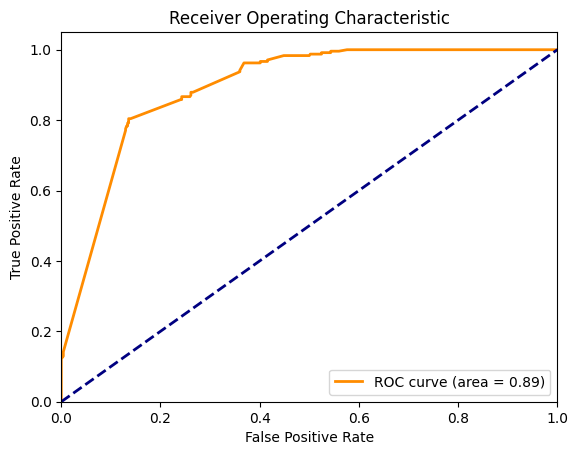

In [130]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


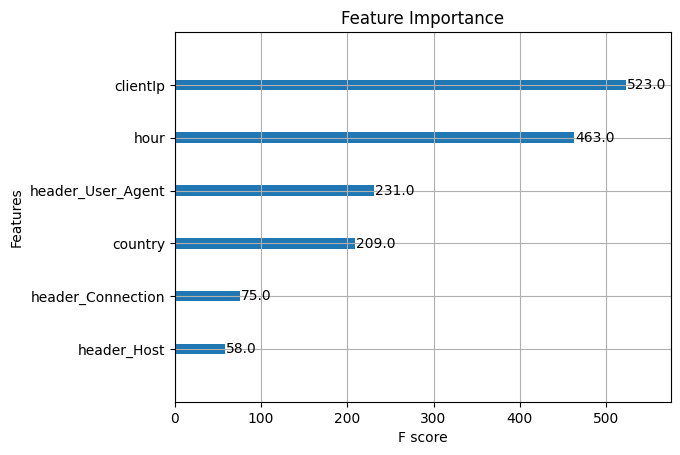

In [134]:
# Feature Importance
import matplotlib.pyplot as plt
import xgboost as xgb

# Feature importance plot
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

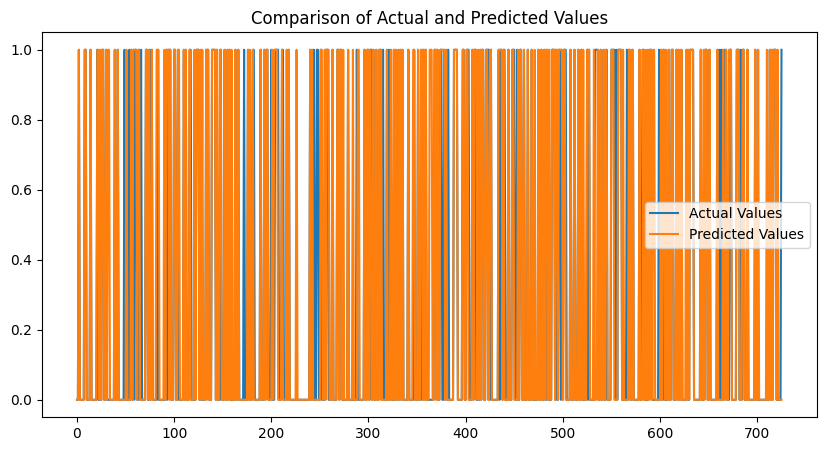

In [136]:
# 예측값과 실제값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.title('Comparison of Actual and Predicted Values')
plt.show()


Accuracy: 0.8556902620258114


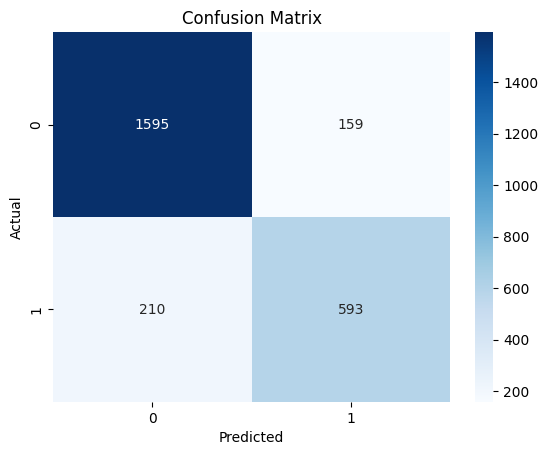

Classification Report:
              precision    recall  f1-score   support

       ALLOW       0.88      0.91      0.90      1754
       BLOCK       0.79      0.74      0.76       803

    accuracy                           0.86      2557
   macro avg       0.84      0.82      0.83      2557
weighted avg       0.85      0.86      0.85      2557



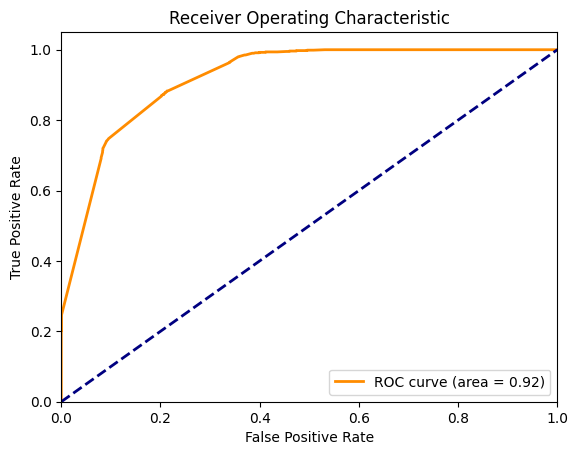

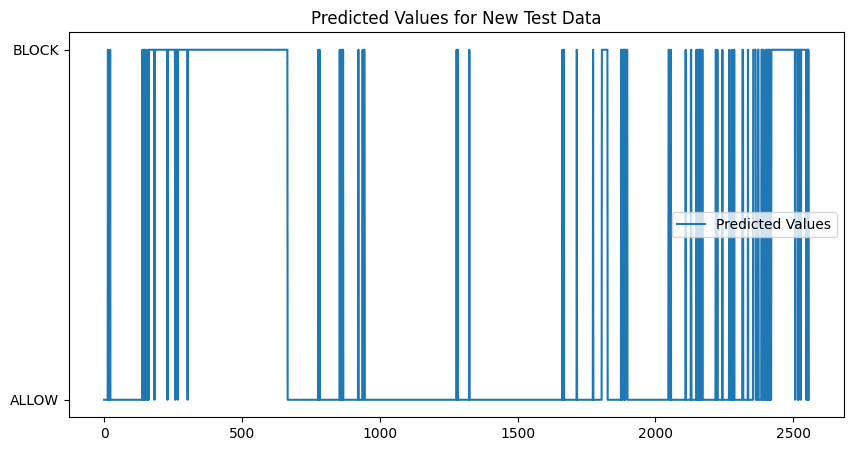

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np  # numpy 패키지 임포트 추가

# 새로운 테스트 데이터 로드
df_test = pd.read_csv('/Users/lkk/Desktop/AI/combined.csv')  # 새로운 테스트 데이터 파일 경로


# 필요한 특성 선택 (예시)
features = ['clientIp', 'country', 'httpVersion',  'header_Host', 'header_User_Agent', 'hour','header_Connection']
target = 'action'  # 예측하려는 목표 변수

# 범주형 변수 인코딩 (테스트 데이터)
for col in features:
    if df_test[col].dtype == 'object':
        if col in label_encoders:
            le = label_encoders[col]
            df_test[col] = df_test[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
            le.classes_ = np.append(le.classes_, '<unknown>')
            df_test[col] = le.transform(df_test[col])
        else:
            le = LabelEncoder()
            df_test[col] = le.fit_transform(df_test[col])
            label_encoders[col] = le

# 목표 변수 인코딩 (테스트 데이터, if available)
if target in df_test.columns:
    df_test[target] = le_target.transform(df_test[target])

# 특성 및 타겟 데이터셋 생성
X_test_new = df_test[features]
if target in df_test.columns:
    y_test_new = df_test[target]

# 모델 로드
model = joblib.load('xgb_model.pkl')
le_target = joblib.load('label_encoder_target.pkl')

# 예측
y_pred_new = model.predict(X_test_new)
y_pred_proba_new = model.predict_proba(X_test_new)[:, 1]

# 예측 값 디코딩
y_pred_new_decoded = le_target.inverse_transform(y_pred_new)

# 모델 평가 (if target available)
if target in df_test.columns:
    y_test_new_decoded = le_target.inverse_transform(y_test_new)
    accuracy_new = accuracy_score(y_test_new_decoded, y_pred_new_decoded)
    print(f'Accuracy: {accuracy_new}')

    # Confusion Matrix 시각화
    conf_matrix_new = confusion_matrix(y_test_new_decoded, y_pred_new_decoded)
    sns.heatmap(conf_matrix_new, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    class_report_new = classification_report(y_test_new_decoded, y_pred_new_decoded)
    print('Classification Report:')
    print(class_report_new)

    # ROC Curve and AUC 시각화
    fpr_new, tpr_new, _ = roc_curve(y_test_new, y_pred_proba_new)
    roc_auc_new = roc_auc_score(y_test_new, y_pred_proba_new)

    plt.figure()
    plt.plot(fpr_new, tpr_new, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_new:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# 새로운 데이터 예측 결과 비교 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_pred_new_decoded, label='Predicted Values')
plt.legend()
plt.title('Predicted Values for New Test Data')
plt.show()

Accuracy: 0.8429752066115702
Confusion Matrix:
[[420  66]
 [ 48 192]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       486
           1       0.74      0.80      0.77       240

    accuracy                           0.84       726
   macro avg       0.82      0.83      0.83       726
weighted avg       0.85      0.84      0.84       726



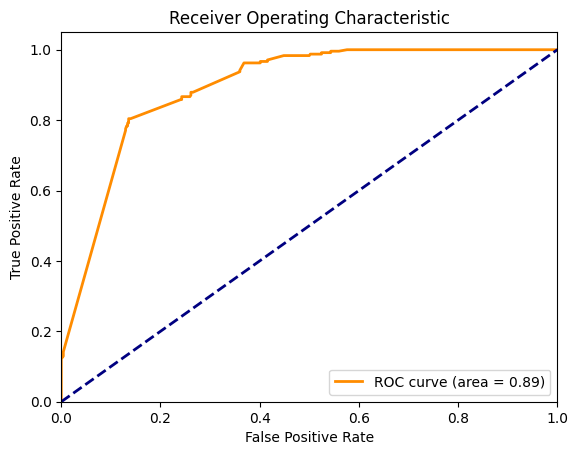

In [137]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
